In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Datasets/Heart.csv")
data.head()

print(data.shape)
data.info()

(303, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


# EDA

In [3]:
data.shape

(303, 15)

In [6]:
data['AHD'].value_counts()

AHD
No     164
Yes    139
Name: count, dtype: int64

In [7]:
data[data['Ca'].isna() | data['Thal'].isna()]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
166,167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
266,267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes
287,288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [8]:
data['Ca'].value_counts()

Ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [9]:
data['Thal'].value_counts()

Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(297, 15)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# sns.histplot(data=data,x='RestBP',kde=True)
# plt.axvline(data['RestBP'].mean()+(3*data['RestBP'].std()),color='red')

In [14]:

def checkOutliers(data, col):
    plt.figure(figsize=(12,4))   # bigger figure

    plt.subplot(1, 2, 1)
    plt.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout(pad=3)      # space from borders

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, kde=True)
    
    mean = data[col].mean()
    std = data[col].std()
    
    plt.axvline(mean + 3*std, color='red', linestyle='--')
    plt.axvline(mean - 3*std, color='red', linestyle='--')
    plt.title(f"Histogram of {col}")

    plt.tight_layout(pad=3)      # space between plots
    plt.show()


In [15]:
def handleOutliers(data,col):
    q3=data[col].quantile(0.75)
    q1=data[col].quantile(0.25)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    data.loc[data[col]>upper,col]=upper
    data.loc[data[col]<lower,col]=lower

In [16]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
data['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [18]:
data['ChestPain']=data['ChestPain'].replace({'typical':0, 'asymptomatic':1, 'nonanginal':2, 'nontypical':3})

In [19]:
data['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [20]:
data['Thal']=data['Thal'].replace({'fixed':0, 'normal':1, 'reversable':2})

In [21]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
3,4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
4,5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No


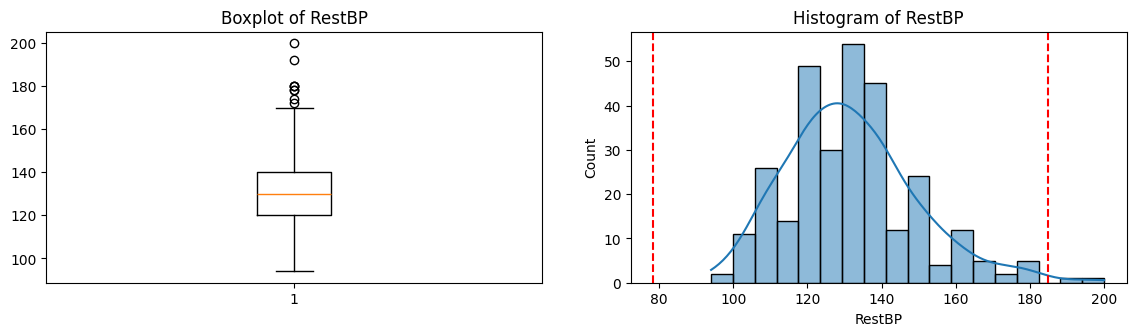

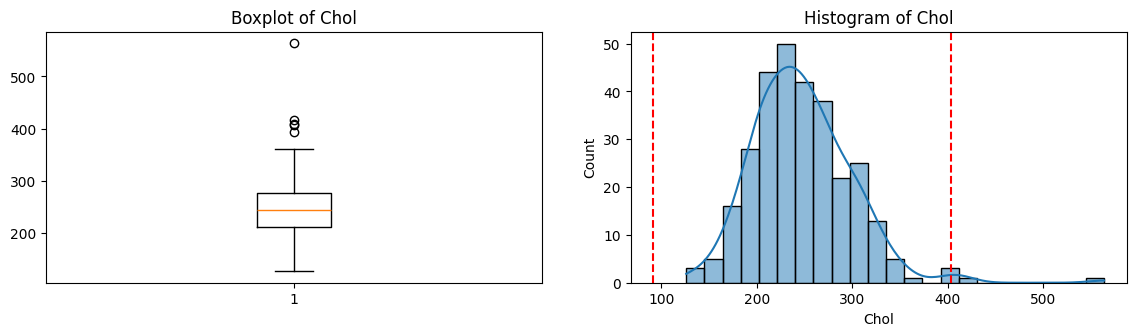

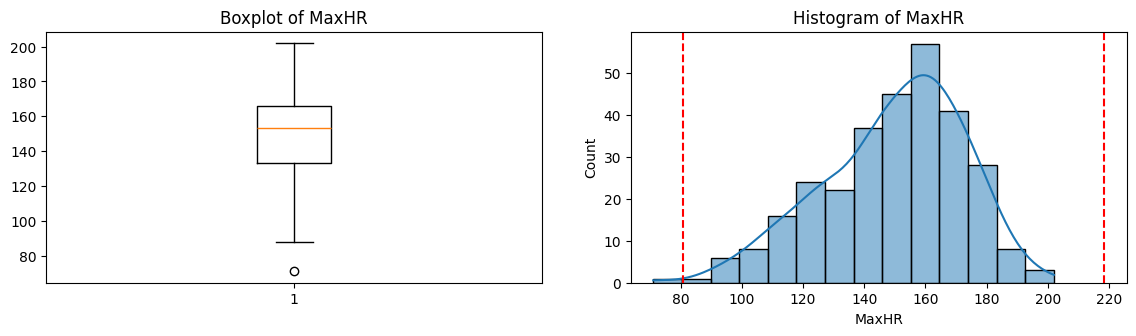

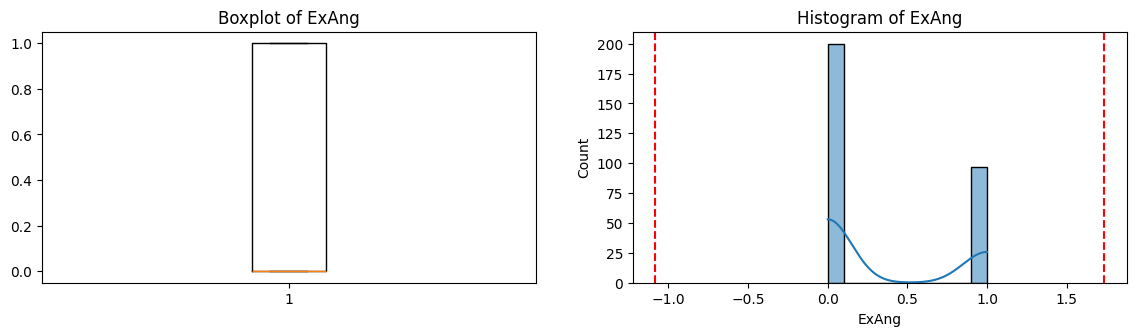

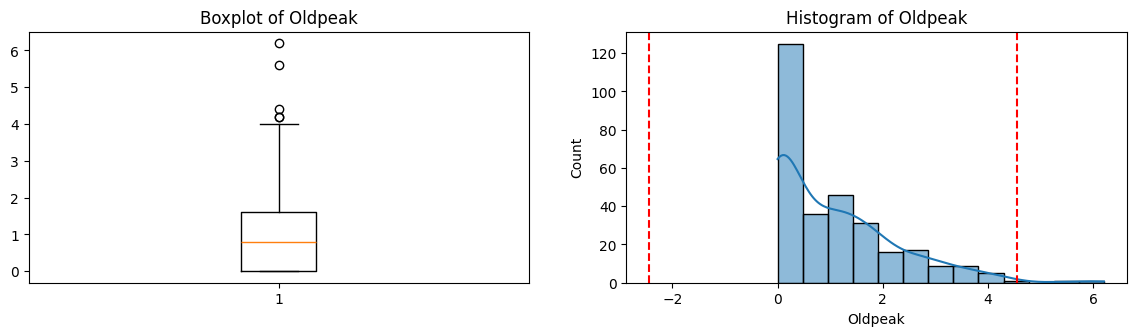

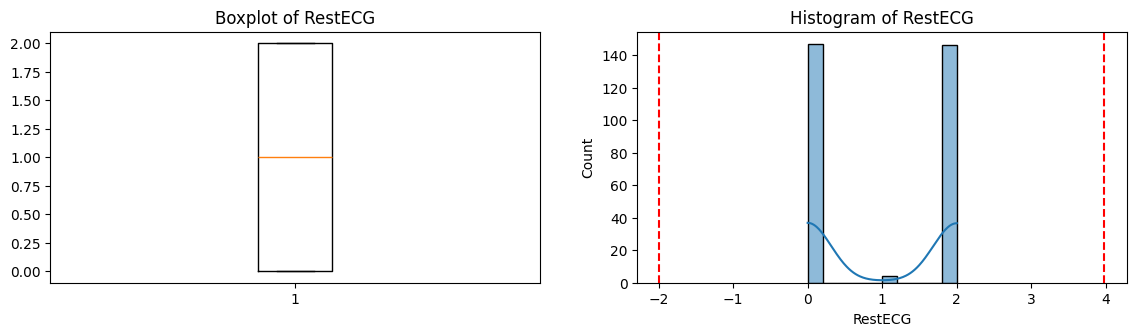

In [22]:
checkOutliers(data,'RestBP')
checkOutliers(data,'Chol')
checkOutliers(data,'MaxHR')
checkOutliers(data,'ExAng')
checkOutliers(data,'Oldpeak')
checkOutliers(data,'RestECG')


In [23]:
handleOutliers(data,'RestBP')
handleOutliers(data,'Chol')
handleOutliers(data,'MaxHR')
handleOutliers(data,'ExAng')
handleOutliers(data,'Oldpeak')
handleOutliers(data,'RestECG')

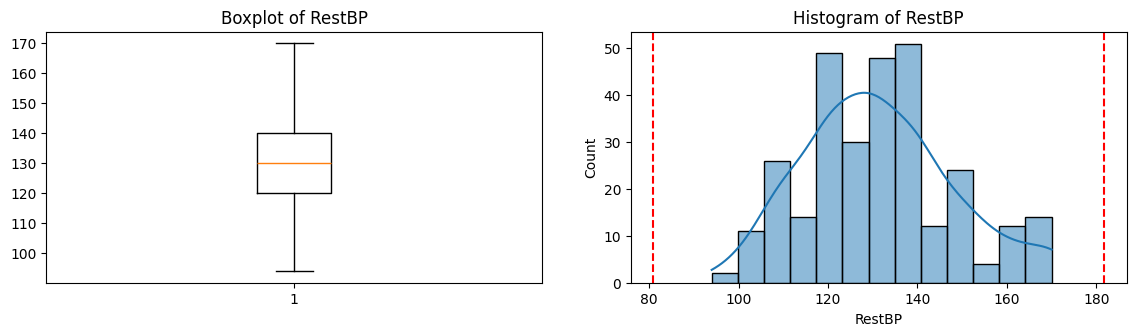

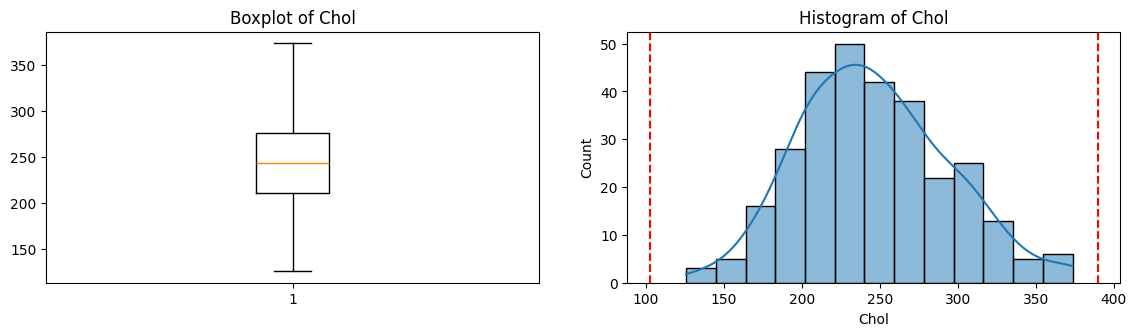

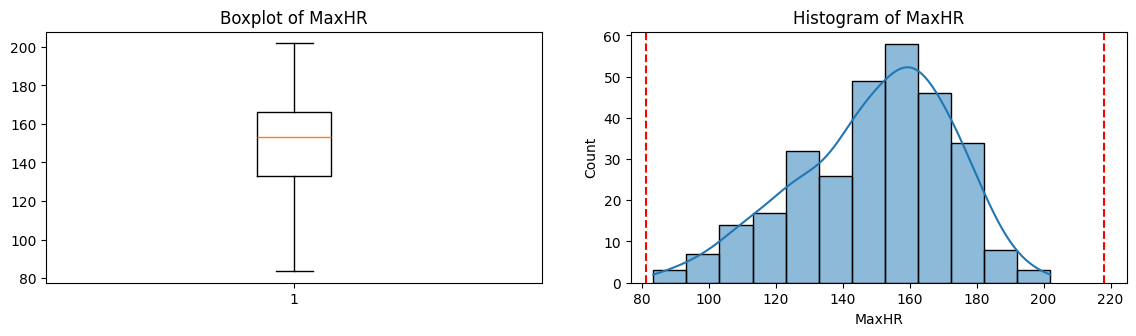

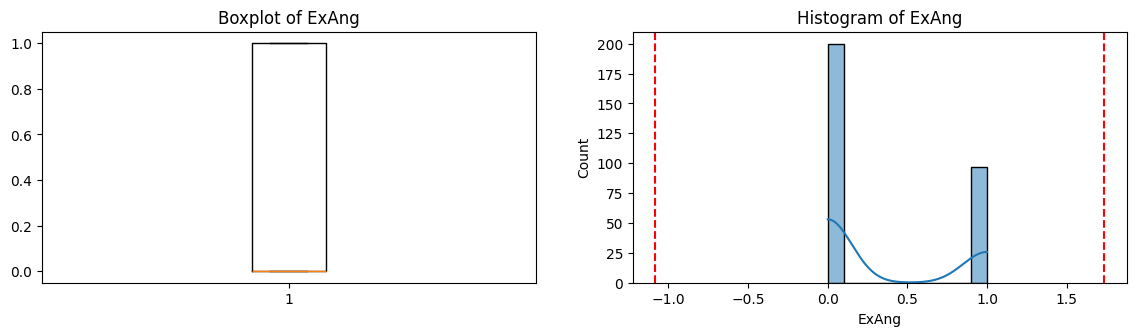

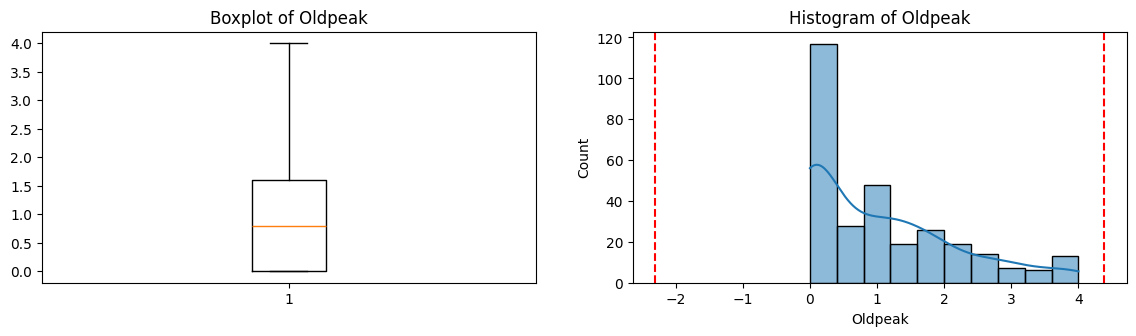

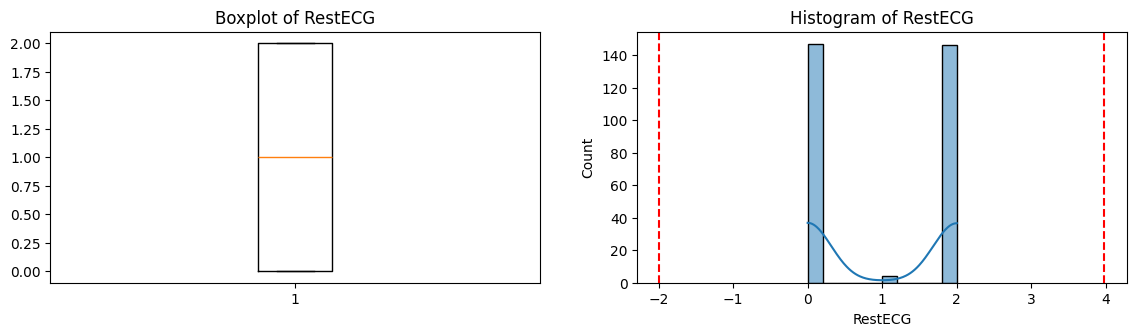

In [24]:
checkOutliers(data,'RestBP')
checkOutliers(data,'Chol')
checkOutliers(data,'MaxHR')
checkOutliers(data,'ExAng')
checkOutliers(data,'Oldpeak')
checkOutliers(data,'RestECG')

# Feature Engineering

In [25]:
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233.0,1,2,150.0,0.0,2.3,3,0.0,0,No
1,2,67,1,1,160,286.0,0,2,108.0,1.0,1.5,2,3.0,1,Yes
2,3,67,1,1,120,229.0,0,2,129.0,1.0,2.6,2,2.0,2,Yes
3,4,37,1,2,130,250.0,0,0,187.0,0.0,3.5,3,0.0,1,No
4,5,41,0,3,130,204.0,0,2,172.0,0.0,1.4,1,0.0,1,No


In [26]:
data.describe()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,1.531987,131.343434,246.260943,0.144781,0.996633,149.641414,0.326599,1.040067,1.602694,0.676768,1.326599
std,87.323283,9.049736,0.468500,0.858082,16.801401,47.836752,0.352474,0.994914,22.807957,0.469761,1.114574,0.618187,0.938965,0.585061
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,83.500000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,75.000000,48.000000,0.000000,1.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,150.000000,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000
75%,226.000000,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,302.000000,77.000000,1.000000,3.000000,170.000000,373.500000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,2.000000


In [27]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data['AHD']=le.fit_transform(data['AHD'])

In [28]:
# plt.figure(figsize=(10,10))
# sns.heatmap(data.corr(),annot=True)
# plt.show()

In [29]:
y=data['AHD']
data=data.drop(['Unnamed: 0','AHD'],axis=1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def calculate(data):
    vif=[]
    output=pd.DataFrame()
    output['Attribute']=data.columns
    for i in range(0,data.shape[1]):
        vif.append(variance_inflation_factor(data,i))
    output['vif']=vif
    return output

In [32]:
calculate(data)

,Attribute,vif
0,Age,42.646138
1,Sex,3.364649
2,ChestPain,5.081739
3,RestBP,64.680578
4,Chol,29.907175
5,Fbs,1.231247
6,RestECG,2.179904
7,MaxHR,38.408260
8,ExAng,1.891928
9,Oldpeak,3.324243


In [33]:
# data=data.drop(['Age','RestBP','Chol','MaxHR','Slope'],axis=1)
data=data.drop(['RestBP'],axis=1)

In [34]:
data.head()

,Age,Sex,ChestPain,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,233.0,1,2,150.0,0.0,2.3,3,0.0,0
1,67,1,1,286.0,0,2,108.0,1.0,1.5,2,3.0,1
2,67,1,1,229.0,0,2,129.0,1.0,2.6,2,2.0,2
3,37,1,2,250.0,0,0,187.0,0.0,3.5,3,0.0,1
4,41,0,3,204.0,0,2,172.0,0.0,1.4,1,0.0,1


In [35]:
calculate(data)

,Attribute,vif
0,Age,31.541375
1,Sex,3.360072
2,ChestPain,5.079559
3,Chol,29.161554
4,Fbs,1.216440
5,RestECG,2.173238
6,MaxHR,29.018129
7,ExAng,1.879607
8,Oldpeak,3.296147
9,Slope,11.126255


In [36]:
data=data.drop(['Age'],axis=1)

In [37]:
calculate(data)

,Attribute,vif
0,Sex,3.358394
1,ChestPain,5.062526
2,Chol,24.238184
3,Fbs,1.210361
4,RestECG,2.165831
5,MaxHR,26.188798
6,ExAng,1.875803
7,Oldpeak,3.295742
8,Slope,10.156693
9,Ca,1.817173


In [38]:
calculate(data)

,Attribute,vif
0,Sex,3.358394
1,ChestPain,5.062526
2,Chol,24.238184
3,Fbs,1.210361
4,RestECG,2.165831
5,MaxHR,26.188798
6,ExAng,1.875803
7,Oldpeak,3.295742
8,Slope,10.156693
9,Ca,1.817173


In [39]:
data=data.drop(['MaxHR'],axis=1)

In [40]:
calculate(data)

,Attribute,vif
0,Sex,3.115351
1,ChestPain,4.414352
2,Chol,13.599474
3,Fbs,1.208812
4,RestECG,2.164107
5,ExAng,1.801910
6,Oldpeak,3.248737
7,Slope,9.809910
8,Ca,1.784341
9,Thal,6.659506


In [41]:
data=data.drop(['Chol'],axis=1)

In [42]:
calculate(data)

,Attribute,vif
0,Sex,3.112613
1,ChestPain,3.295996
2,Fbs,1.208302
3,RestECG,2.018355
4,ExAng,1.789078
5,Oldpeak,3.223344
6,Slope,8.164994
7,Ca,1.743843
8,Thal,5.580397


In [43]:
data=data.drop(['Slope'],axis=1)

In [44]:
calculate(data)

,Attribute,vif
0,Sex,3.074668
1,ChestPain,2.687094
2,Fbs,1.198523
3,RestECG,1.901072
4,ExAng,1.748992
5,Oldpeak,2.274272
6,Ca,1.740962
7,Thal,5.067392


In [45]:
X=data

In [46]:
X.head()

,Sex,ChestPain,Fbs,RestECG,ExAng,Oldpeak,Ca,Thal
0,1,0,1,2,0.0,2.3,0.0,0
1,1,1,0,2,1.0,1.5,3.0,1
2,1,1,0,2,1.0,2.6,2.0,2
3,1,2,0,0,0.0,3.5,0.0,1
4,0,3,0,2,0.0,1.4,0.0,1


In [47]:
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [48]:
X.describe()

,Sex,ChestPain,Fbs,RestECG,ExAng,Oldpeak,Ca,Thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,0.676768,1.531987,0.144781,0.996633,0.326599,1.040067,0.676768,1.326599
std,0.468500,0.858082,0.352474,0.994914,0.469761,1.114574,0.938965,0.585061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.800000,0.000000,1.000000
75%,1.000000,2.000000,0.000000,2.000000,1.000000,1.600000,1.000000,2.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,3.000000,2.000000


In [49]:
y.describe()

count     297
unique      2
top        No
freq      160
Name: AHD, dtype: object

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss=StandardScaler()
X_trans=ss.fit_transform(X)

# Splitting data into training and testing

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_trans,y,test_size=0.3,random_state=42,stratify=y)

In [53]:
# print(X_train)

# Model Build

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [55]:
rf=RandomForestClassifier( n_estimators=300,random_state=42,class_weight="balanced")
result=cross_validate(rf,X_train,y_train)
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [56]:
result['test_score'].mean()

np.float64(0.8066202090592334)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_pred=rf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,test_pred))

Accuracy: 0.7444444444444445


In [58]:
print(confusion_matrix(y_test, test_pred))


[[41  7]
 [16 26]]


In [59]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

          No       0.72      0.85      0.78        48
         Yes       0.79      0.62      0.69        42

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90

